# Evaluation Double Shared State Model

import statements:

In [1]:
import sys
sys.path.append('../')

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from keras.layers import Dense, Dropout

import tensorflow as tf
import numpy as np
from tqdm import tqdm
from keras.layers import Dense, Dropout, GRU


import tensorflow as tf
import numpy as np

from machine_learning.models import DoubleStateProduction
from data_processing.batch_generator import load_test_set
tf.random.set_seed(42)

define model:

In [3]:
model = DoubleStateProduction()


In [4]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(),
            tf.keras.metrics.TruePositives(), 
            tf.keras.metrics.TrueNegatives(),
            tf.keras.metrics.FalsePositives(), 
            tf.keras.metrics.FalseNegatives(),
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])


### Dataset

In [5]:
path = '../data'
BATCH_SIZE = 1024
SEQUENCE_LENGTH = 100

In [6]:
test_transactions = np.load(f'{path}/test/transactions.npy')
test_labels = np.load(f'{path}/test/all_transaction_labels.npy').astype(float)
test_set = tf.data.Dataset.from_tensor_slices((test_transactions, test_labels)).batch(1)
# initialize weights
model(np.expand_dims(test_transactions[0], axis=0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.36237353]], dtype=float32)>

### Evaluate Model

In [8]:
num_epochs = 20

In [9]:
results = []
for epoch in range(num_epochs):
    print(f"[EPOCH {epoch}]")
    model_path = f'../machine_learning/saved_models/double/Double_{epoch}.keras'
    model.load_weights(model_path)
    model.card_gru.reset_states()
    model.category_gru.reset_states()

    results.append(model.evaluate(test_set, return_dict=True))

[EPOCH 0]
555719/555719 [==============================] - 485s 871us/step - loss: 0.0344 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00
[EPOCH 1]
555719/555719 [==============================] - 491s 884us/step - loss: 0.0251 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00
[EPOCH 2]
555719/555719 [==============================] - 503s 906us/step - loss: 0.0234 - binary_accuracy: 0.9962 - true_positives: 13.0000 - true_negatives: 553571.0000 - false_positives: 3.0000 - false_negatives: 2132.0000 - precision: 0.8125 - recall: 0.0061
[EPOCH 3]
555719/555719 [==============================] - 498s 897us/step - loss: 0.0209 - binary_accuracy: 0.9963 - true_positives: 160.0000 - true_negatives: 553495.0000 - fal

In [10]:
import pandas as pd

pd.DataFrame(results)

,loss,binary_accuracy,true_positives,true_negatives,false_positives,false_negatives,precision,recall
0,0.034405,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
1,0.025139,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
2,0.023441,0.996158,13.0,553571.0,3.0,2132.0,0.812500,0.006061
3,0.020915,0.996286,160.0,553495.0,79.0,1985.0,0.669456,0.074592
4,0.019833,0.996253,919.0,552718.0,856.0,1226.0,0.517747,0.428438
5,0.016890,0.996507,826.0,552952.0,622.0,1319.0,0.570442,0.385082
6,0.016376,0.995625,1234.0,552054.0,1520.0,911.0,0.448076,0.575291
7,0.013940,0.997295,1055.0,553161.0,413.0,1090.0,0.718665,0.491841
8,0.059781,0.993103,911.0,550975.0,2599.0,1234.0,0.259544,0.424709
9,0.017871,0.996601,1207.0,552623.0,951.0,938.0,0.559314,0.562704


Looking at the metrics, the one which yielded the best results was at **epoch 15** with the best balance between precision and recall:

### Confusion Matrix

In [7]:
model.load_weights(f'../machine_learning/saved_models/double/Double_{15}.keras')
inputs = [[553099/(553099+475), 475/(553099+475)], [766/(1379+766), 1379/(1379+766)]]

In [8]:
model.evaluate(test_set)

555719/555719 [==============================] - 320s 575us/step - loss: 0.0149 - binary_accuracy: 0.9978 - true_positives: 1356.0000 - true_negatives: 553141.0000 - false_positives: 433.0000 - false_negatives: 789.0000 - precision: 0.7580 - recall: 0.6322


[0.014940619468688965,
 0.9978010654449463,
 1356.0,
 553141.0,
 433.0,
 789.0,
 0.7579653263092041,
 0.6321678161621094]

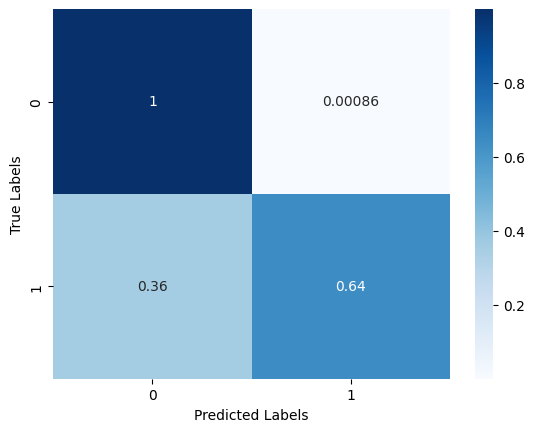

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using a heatmap
sns.heatmap(inputs, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [10]:
y_pred_proba = model.predict(test_set)

555719/555719 [==============================] - 258s 464us/step


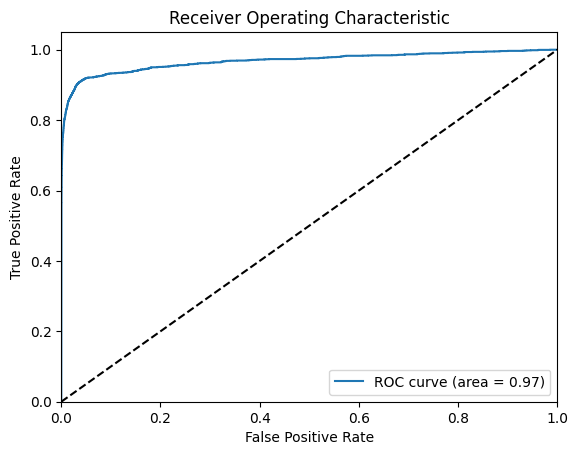

In [11]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds using NumPy
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate AUC using scikit-learn
auc_score = auc(fpr, tpr)

# Plot ROC curve using Matplotlib
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


0,0148833330



78644/78644 [==============================] - 113s 1ms/step - loss: 0.0161 - binary_accuracy: 0.9973 - true_positives: 166.0000 - true_negatives: 78268.0000 - false_positives: 76.0000 - false_negatives: 134.0000 - precision: 0.6860 - recall: 0.5533           
79236/79236 [==============================] - 113s 1ms/step - loss: 0.0152 - binary_accuracy: 0.9978 - true_positives: 220.0000 - true_negatives: 78838.0000 - false_positives: 52.0000 - false_negatives: 126.0000 - precision: 0.8088 - recall: 0.6358
[WORKER 4]: Total time: 113.38421487808228 s, Average forward pass: 0.0010946097983699655 s, Throughput: 698.8274345348641 s
78891/78891 [==============================] - 114s 1ms/step - loss: 0.0148 - binary_accuracy: 0.9978 - true_positives: 183.0000 - true_negatives: 78538.0000 - false_positives: 53.0000 - false_negatives: 117.0000 - precision: 0.7754 - recall: 0.6100
[WORKER 6]: Total time: 113.50196051597595 s, Average forward pass: 0.001098645970838637 s, Throughput: 695.0628838600168 s
80251/80251 [==============================] - 114s 1ms/step - loss: 0.0161 - binary_accuracy: 0.9975 - true_positives: 209.0000 - true_negatives: 79839.0000 - false_positives: 64.0000 - false_negatives: 139.0000 - precision: 0.7656 - recall: 0.6006
[WORKER 1]: Total time: 113.69675660133362 s, Average forward pass: 0.0010858765435847752 s, Throughput: 705.8336789798865 s
79516/79516 [==============================] - 114s 1ms/step - loss: 0.0146 - binary_accuracy: 0.9978 - true_positives: 172.0000 - true_negatives: 79166.0000 - false_positives: 91.0000 - false_negatives: 87.0000 - precision: 0.6540 - recall: 0.6641
[WORKER 3]: Total time: 113.93395233154297 s, Average forward pass: 0.0010978270359001886 s, Throughput: 697.9131187217293 s
79338/79338 [==============================] - 114s 1ms/step - loss: 0.0129 - binary_accuracy: 0.9987 - true_positives: 144.0000 - true_negatives: 79091.0000 - false_positives: 33.0000 - false_negatives: 70.0000 - precision: 0.8136 - recall: 0.6729
[WORKER 5]: Total time: 114.22647023200989 s, Average forward pass: 0.0011040956084700413 s, Throughput: 694.5675537277258 s
79843/79843 [==============================] - 114s 1ms/step - loss: 0.0148 - binary_accuracy: 0.9977 - true_positives: 264.0000 - true_negatives: 79396.0000 - false_positives: 69.0000 - false_negatives: 114.0000 - precision: 0.7928 - recall: 0.6984
[WORKER 2]: Total time: 114.39914441108704 s, Average forward pass: 0.0010951993018793738 s, Throughput: 697.9335414702803 s
[WORKER 0]: Total time: 112.53171467781067 s, Average forward pass: 0.001096916598297743 s, Throughput: 698.8607631649929 s


(0.0148+0.0156+0.0154+0.0154+0.0149+0.0148+0.0151+0.0135)/8

69394/69394 [==============================] - 127s 2ms/step - loss: 0.0148 - binary_accuracy: 0.9977 - true_positives: 223.0000 - true_negatives: 69011.0000 - false_positives: 57.0000 - false_negatives: 103.0000 - precision: 0.7964 - recall: 0.6840           
[WORKER 5]: Total time: 127.09262919425964 s, Average forward pass: 0.0014144198181313301 s, Throughput: 546.0112080452129 s
69108/69108 [==============================] - 127s 2ms/step - loss: 0.0156 - binary_accuracy: 0.9976 - true_positives: 185.0000 - true_negatives: 68759.0000 - false_positives: 45.0000 - false_negatives: 119.0000 - precision: 0.8043 - recall: 0.6086
[WORKER 6]: Total time: 127.1844367980957 s, Average forward pass: 0.001422763098484734 s, Throughput: 543.3683691166428 s
68937/68937 [==============================] - 128s 2ms/step - loss: 0.0154 - binary_accuracy: 0.9975 - true_positives: 157.0000 - true_negatives: 68608.0000 - false_positives: 74.0000 - false_negatives: 98.0000 - precision: 0.6797 - recall: 0.6157
[WORKER 7]: Total time: 127.56530952453613 s, Average forward pass: 0.0014325931800353005 s, Throughput: 540.4055401656086 s
68685/68685 [==============================] - 128s 2ms/step - loss: 0.0154 - binary_accuracy: 0.9978 - true_positives: 121.0000 - true_negatives: 68416.0000 - false_positives: 49.0000 - false_negatives: 99.0000 - precision: 0.7118 - recall: 0.5500
[WORKER 0]: Total time: 127.83991885185242 s, Average forward pass: 0.0014347314747815015 s, Throughput: 537.2734949839554 s
69717/69717 [==============================] - 128s 2ms/step - loss: 0.0149 - binary_accuracy: 0.9979 - true_positives: 193.0000 - true_negatives: 69378.0000 - false_positives: 51.0000 - false_negatives: 95.0000 - precision: 0.7910 - recall: 0.6701
[WORKER 3]: Total time: 127.92517042160034 s, Average forward pass: 0.0014180218798791706 s, Throughput: 544.9826626787764 s
69659/69659 [==============================] - 128s 2ms/step - loss: 0.0148 - binary_accuracy: 0.9977 - true_positives: 180.0000 - true_negatives: 69322.0000 - false_positives: 60.0000 - false_negatives: 97.0000 - precision: 0.7500 - recall: 0.6498
[WORKER 2]: Total time: 128.26452016830444 s, Average forward pass: 0.0014240404495745045 s, Throughput: 543.0886102298264 s
69931/69931 [==============================] - 129s 2ms/step - loss: 0.0151 - binary_accuracy: 0.9979 - true_positives: 146.0000 - true_negatives: 69638.0000 - false_positives: 58.0000 - false_negatives: 89.0000 - precision: 0.7157 - recall: 0.6213
[WORKER 4]: Total time: 128.5799000263214 s, Average forward pass: 0.0014218892256225668 s, Throughput: 543.8719425484428 s
70288/70288 [==============================] - 129s 2ms/step - loss: 0.0135 - binary_accuracy: 0.9981 - true_positives: 152.0000 - true_negatives: 70004.0000 - false_positives: 44.0000 - false_negatives: 88.0000 - precision: 0.7755 - recall: 0.6333
[WORKER 1]: Total time: 129.11177563667297 s, Average forward pass: 0.001421475126209819 s, Throughput: 544.3965095623344 s

(0.0174+0.0159+0.0123+0.0152+0.0135+0.0146+0.0162+0.0146+0.0149)/9



61109/61109 [==============================] - 132s 2ms/step - loss: 0.0174 - binary_accuracy: 0.9971 - true_positives: 172.0000 - true_negatives: 60759.0000 - false_positives: 44.0000 - false_negatives: 134.0000 - precision: 0.7963 - recall: 0.5621           
[WORKER 8]: Total time: 131.5071702003479 s, Average forward pass: 0.001666844947482968 s, Throughput: 464.6818869792572 s
62478/62478 [==============================] - 133s 2ms/step - loss: 0.0159 - binary_accuracy: 0.9974 - true_positives: 166.0000 - true_negatives: 62151.0000 - false_positives: 58.0000 - false_negatives: 103.0000 - precision: 0.7411 - recall: 0.6171
[WORKER 2]: Total time: 132.59049439430237 s, Average forward pass: 0.001640842358462083 s, Throughput: 471.2102499158098 s
61147/61147 [==============================] - 133s 2ms/step - loss: 0.0123 - binary_accuracy: 0.9985 - true_positives: 129.0000 - true_negatives: 60929.0000 - false_positives: 40.0000 - false_negatives: 49.0000 - precision: 0.7633 - recall: 0.7247
[WORKER 0]: Total time: 132.9764199256897 s, Average forward pass: 0.0016862876530627205 s, Throughput: 459.83340530727446 s
62237/62237 [==============================] - 133s 2ms/step - loss: 0.0152 - binary_accuracy: 0.9978 - true_positives: 146.0000 - true_negatives: 61953.0000 - false_positives: 56.0000 - false_negatives: 82.0000 - precision: 0.7228 - recall: 0.6404
[WORKER 3]: Total time: 132.95898008346558 s, Average forward pass: 0.0016589168832861277 s, Throughput: 468.0917374736964 s
62105/62105 [==============================] - 133s 2ms/step - loss: 0.0135 - binary_accuracy: 0.9982 - true_positives: 104.0000 - true_negatives: 61889.0000 - false_positives: 40.0000 - false_negatives: 72.0000 - precision: 0.7222 - recall: 0.5909
[WORKER 1]: Total time: 133.25257778167725 s, Average forward pass: 0.0016654081692414223 s, Throughput: 466.06978291822344 s
61315/61315 [==============================] - 133s 2ms/step - loss: 0.0146 - binary_accuracy: 0.9978 - true_positives: 141.0000 - true_negatives: 61040.0000 - false_positives: 66.0000 - false_negatives: 68.0000 - precision: 0.6812 - recall: 0.6746
[WORKER 6]: Total time: 133.1257622241974 s, Average forward pass: 0.0016852478116621914 s, Throughput: 460.579522517507 s
61966/61966 [==============================] - 133s 2ms/step - loss: 0.0162 - binary_accuracy: 0.9975 - true_positives: 142.0000 - true_negatives: 61672.0000 - false_positives: 51.0000 - false_negatives: 101.0000 - precision: 0.7358 - recall: 0.5844
[WORKER 5]: Total time: 133.21550512313843 s, Average forward pass: 0.0016682160407390373 s, Throughput: 465.1560637984401 s
61740/61740 [==============================] - 133s 2ms/step - loss: 0.0146 - binary_accuracy: 0.9978 - true_positives: 191.0000 - true_negatives: 61414.0000 - false_positives: 43.0000 - false_negatives: 92.0000 - precision: 0.8162 - recall: 0.6749
[WORKER 4]: Total time: 133.39429211616516 s, Average forward pass: 0.0016758355501210146 s, Throughput: 462.8383945111707 s
61622/61622 [==============================] - 134s 2ms/step - loss: 0.0149 - binary_accuracy: 0.9979 - true_positives: 165.0000 - true_negatives: 61328.0000 - false_positives: 41.0000 - false_negatives: 88.0000 - precision: 0.8010 - recall: 0.6522
[WORKER 7]: Total time: 133.54385232925415 s, Average forward pass: 0.001681271022174983 s, Throughput: 461.4364414774417 s


(0.0143+0.0127+0.0134+0.0156+0.0142+0.0172+0.0166+0.0140+0.0142+0.0171)/10
152+112+126+204+94.+136+119+131+49+234
55019/55019 [==============================] - 115s 2ms/step - loss: 0.0143 - binary_accuracy: 0.9980 - true_positives: 152.0000 - true_negatives: 54756.0000 - false_positives: 39.0000 - false_negatives: 72.0000 - precision: 0.7958 - recall: 0.6786            
[WORKER 0]: Total time: 114.69038653373718 s, Average forward pass: 0.0016142997290333706 s, Throughput: 479.7176264099143 s
55128/55128 [==============================] - 115s 2ms/step - loss: 0.0127 - binary_accuracy: 0.9983 - true_positives: 112.0000 - true_negatives: 54925.0000 - false_positives: 40.0000 - false_negatives: 51.0000 - precision: 0.7368 - recall: 0.6871
[WORKER 7]: Total time: 114.66191244125366 s, Average forward pass: 0.0016119591929607754 s, Throughput: 480.78737591477466 s
55151/55151 [==============================] - 115s 2ms/step - loss: 0.0134 - binary_accuracy: 0.9981 - true_positives: 126.0000 - true_negatives: 54922.0000 - false_positives: 35.0000 - false_negatives: 68.0000 - precision: 0.7826 - recall: 0.6495
55482/55482 [==============================] - 116s 2ms/step - loss: 0.0156 - binary_accuracy: 0.9972 - true_positives: 204.0000 - true_negatives: 55124.0000 - false_positives: 50.0000 - false_negatives: 104.0000 - precision: 0.8031 - recall: 0.6623
[WORKER 5]: Total time: 115.79867911338806 s, Average forward pass: 0.0016174122859283367 s, Throughput: 479.1246361771794 s
55169/55169 [==============================] - 116s 2ms/step - loss: 0.0142 - binary_accuracy: 0.9981 - true_positives: 94.0000 - true_negatives: 54971.0000 - false_positives: 43.0000 - false_negatives: 61.0000 - precision: 0.6861 - recall: 0.6065
[WORKER 8]: Total time: 115.87995481491089 s, Average forward pass: 0.0016323788420286114 s, Throughput: 476.0875173632801 s
55375/55375 [==============================] - 116s 2ms/step - loss: 0.0172 - binary_accuracy: 0.9971 - true_positives: 136.0000 - true_negatives: 55081.0000 - false_positives: 40.0000 - false_negatives: 118.0000 - precision: 0.7727 - recall: 0.5354
[WORKER 6]: Total time: 116.32999753952026 s, Average forward pass: 0.0016288134615792646 s, Throughput: 476.01651483906977 s
55776/55776 [==============================] - 117s 2ms/step - loss: 0.0166 - binary_accuracy: 0.9976 - true_positives: 119.0000 - true_negatives: 55524.0000 - false_positives: 50.0000 - false_negatives: 83.0000 - precision: 0.7041 - recall: 0.5891
[WORKER 2]: Total time: 116.83309507369995 s, Average forward pass: 0.001622821552207671 s, Throughput: 477.3989764185886 s
56044/56044 [==============================] - 117s 2ms/step - loss: 0.0140 - binary_accuracy: 0.9981 - true_positives: 131.0000 - true_negatives: 55805.0000 - false_positives: 38.0000 - false_negatives: 70.0000 - precision: 0.7751 - recall: 0.6517
[WORKER 4]: Total time: 117.13308787345886 s, Average forward pass: 0.0016222455484369703 s, Throughput: 478.46429234876325 s
55905/55905 [==============================] - 117s 2ms/step - loss: 0.0142 - binary_accuracy: 0.9984 - true_positives: 49.0000 - true_negatives: 55769.0000 - false_positives: 32.0000 - false_negatives: 55.0000 - precision: 0.6049 - recall: 0.4712
[WORKER 3]: Total time: 117.17876696586609 s, Average forward pass: 0.0016257057099529567 s, Throughput: 477.0915537648984 s
56670/56670 [==============================] - 118s 2ms/step - loss: 0.0171 - binary_accuracy: 0.9969 - true_positives: 234.0000 - true_negatives: 56259.0000 - false_positives: 71.0000 - false_negatives: 106.0000 - precision: 0.7672 - recall: 0.6882
[WORKER 1]: Total time: 117.60816240310669 s, Average forward pass: 0.0016121365941136692 s, Throughput: 481.8543104666605 s
[WORKER 9]: Total time: 115.13105797767639 s, Average forward pass: 0.0016167227008120496 s, Throughput: 479.02799617018746 s
